In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from keras import backend
import torch.optim as optim

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: False 


In [4]:
# Define hyperparameters
batch_size = 64
image_size = 32
latent_dim = 100
lr = 0.0002
beta1 = 0.5
epochs = 20

In [5]:
# Transformations for CIFAR-10
# Normalize images to [-1, 1] to match typical GAN input range
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize R, G, B channels
])

# Load CIFAR-10 dataset
cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Replace MNIST DataLoader with CIFAR-10 DataLoader
data_loader = DataLoader(dataset=cifar10_dataset, batch_size=batch_size, shuffle=True)

# Test: Iterate through the DataLoader
for images, labels in data_loader:
    print(f"Batch image shape: {images.shape}")  # (batch_size, 3, 32, 32)
    print(f"Batch label shape: {labels.shape}")  # (batch_size,)
    break


Files already downloaded and verified
Batch image shape: torch.Size([64, 3, 32, 32])
Batch label shape: torch.Size([64])


Epoch [0/20], Step [0/782], D Loss: 1.2946, G Loss: 1.5477
Epoch [0/20], Step [100/782], D Loss: 0.7809, G Loss: 8.7440
Epoch [0/20], Step [200/782], D Loss: 0.0715, G Loss: 6.3896
Epoch [0/20], Step [300/782], D Loss: 1.5072, G Loss: 6.5936
Epoch [0/20], Step [400/782], D Loss: 0.4297, G Loss: 2.2423
Epoch [0/20], Step [500/782], D Loss: 0.1760, G Loss: 3.9668
Epoch [0/20], Step [600/782], D Loss: 0.0566, G Loss: 4.7150
Epoch [0/20], Step [700/782], D Loss: 0.0678, G Loss: 4.6219


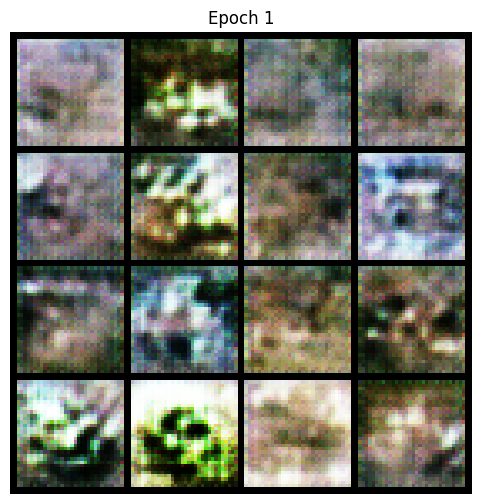

Epoch [1/20], Step [0/782], D Loss: 0.2616, G Loss: 3.7252
Epoch [1/20], Step [100/782], D Loss: 0.5683, G Loss: 4.4569
Epoch [1/20], Step [200/782], D Loss: 0.1166, G Loss: 3.6461
Epoch [1/20], Step [300/782], D Loss: 0.1824, G Loss: 3.4959
Epoch [1/20], Step [400/782], D Loss: 0.5138, G Loss: 1.8573
Epoch [1/20], Step [500/782], D Loss: 0.2549, G Loss: 2.0303
Epoch [1/20], Step [600/782], D Loss: 0.4096, G Loss: 2.3387
Epoch [1/20], Step [700/782], D Loss: 0.1635, G Loss: 3.0758


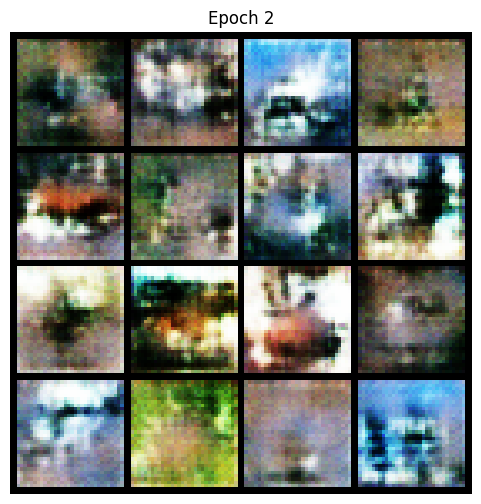

Epoch [2/20], Step [0/782], D Loss: 0.0516, G Loss: 4.4915
Epoch [2/20], Step [100/782], D Loss: 0.1383, G Loss: 3.3834
Epoch [2/20], Step [200/782], D Loss: 0.1074, G Loss: 6.8665
Epoch [2/20], Step [300/782], D Loss: 0.0069, G Loss: 6.4742
Epoch [2/20], Step [400/782], D Loss: 0.4732, G Loss: 3.2315
Epoch [2/20], Step [500/782], D Loss: 0.0570, G Loss: 4.6472
Epoch [2/20], Step [600/782], D Loss: 2.4243, G Loss: 9.6940
Epoch [2/20], Step [700/782], D Loss: 0.0558, G Loss: 4.0043


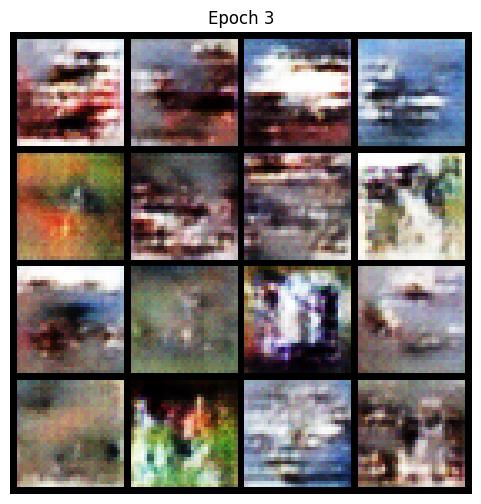

Epoch [3/20], Step [0/782], D Loss: 0.0182, G Loss: 8.5825
Epoch [3/20], Step [100/782], D Loss: 1.1042, G Loss: 8.3840
Epoch [3/20], Step [200/782], D Loss: 0.6057, G Loss: 2.0231
Epoch [3/20], Step [300/782], D Loss: 0.2139, G Loss: 3.0586
Epoch [3/20], Step [400/782], D Loss: 0.3495, G Loss: 3.7963
Epoch [3/20], Step [500/782], D Loss: 0.0896, G Loss: 4.1815
Epoch [3/20], Step [600/782], D Loss: 0.6693, G Loss: 2.4564
Epoch [3/20], Step [700/782], D Loss: 0.5262, G Loss: 4.4001


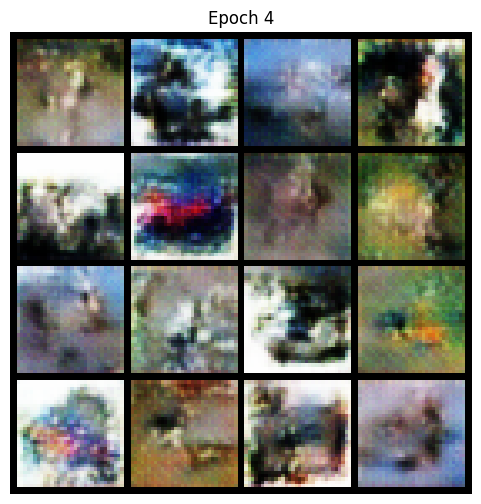

Epoch [4/20], Step [0/782], D Loss: 1.3430, G Loss: 8.1358
Epoch [4/20], Step [100/782], D Loss: 0.0627, G Loss: 7.7826
Epoch [4/20], Step [200/782], D Loss: 2.1906, G Loss: 5.1157
Epoch [4/20], Step [300/782], D Loss: 0.2377, G Loss: 3.8864
Epoch [4/20], Step [400/782], D Loss: 0.1221, G Loss: 3.6344
Epoch [4/20], Step [500/782], D Loss: 1.2085, G Loss: 0.8544
Epoch [4/20], Step [600/782], D Loss: 0.2870, G Loss: 4.1101
Epoch [4/20], Step [700/782], D Loss: 0.1215, G Loss: 3.7097


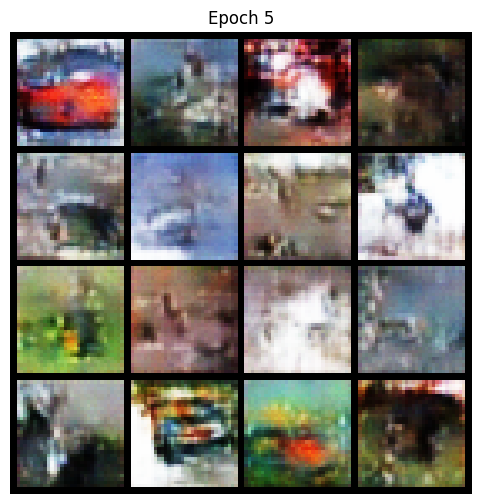

Epoch [5/20], Step [0/782], D Loss: 0.2286, G Loss: 2.4618
Epoch [5/20], Step [100/782], D Loss: 0.1408, G Loss: 5.7150
Epoch [5/20], Step [200/782], D Loss: 1.8349, G Loss: 2.1506
Epoch [5/20], Step [300/782], D Loss: 0.0388, G Loss: 6.4416
Epoch [5/20], Step [400/782], D Loss: 0.1722, G Loss: 3.1011
Epoch [5/20], Step [500/782], D Loss: 0.9778, G Loss: 5.5494
Epoch [5/20], Step [600/782], D Loss: 0.0344, G Loss: 6.5275
Epoch [5/20], Step [700/782], D Loss: 0.4603, G Loss: 2.4231


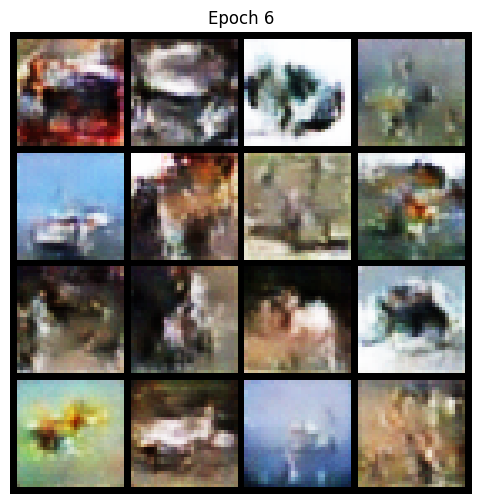

Epoch [6/20], Step [0/782], D Loss: 0.3280, G Loss: 2.8044
Epoch [6/20], Step [100/782], D Loss: 0.2971, G Loss: 2.8592
Epoch [6/20], Step [200/782], D Loss: 0.3974, G Loss: 2.9356
Epoch [6/20], Step [300/782], D Loss: 0.8077, G Loss: 5.5836
Epoch [6/20], Step [400/782], D Loss: 0.0882, G Loss: 3.9658
Epoch [6/20], Step [500/782], D Loss: 0.3449, G Loss: 3.5821
Epoch [6/20], Step [600/782], D Loss: 0.1158, G Loss: 4.2012
Epoch [6/20], Step [700/782], D Loss: 0.2653, G Loss: 3.5440


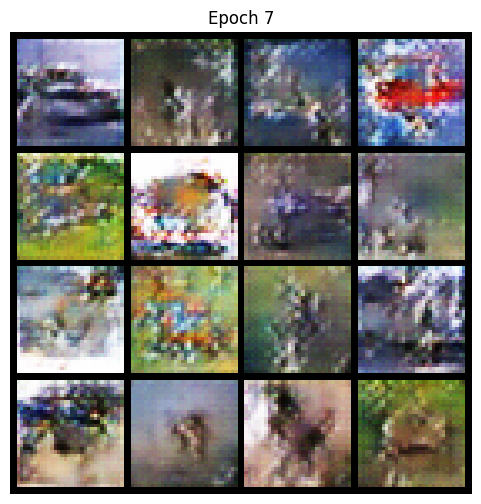

Epoch [7/20], Step [0/782], D Loss: 0.0129, G Loss: 7.7881
Epoch [7/20], Step [100/782], D Loss: 0.3746, G Loss: 2.4218
Epoch [7/20], Step [200/782], D Loss: 0.0608, G Loss: 3.9857
Epoch [7/20], Step [300/782], D Loss: 0.6003, G Loss: 1.3915
Epoch [7/20], Step [400/782], D Loss: 0.0562, G Loss: 6.0716
Epoch [7/20], Step [500/782], D Loss: 0.2161, G Loss: 3.7504
Epoch [7/20], Step [600/782], D Loss: 0.6183, G Loss: 6.7741
Epoch [7/20], Step [700/782], D Loss: 0.0693, G Loss: 4.2091


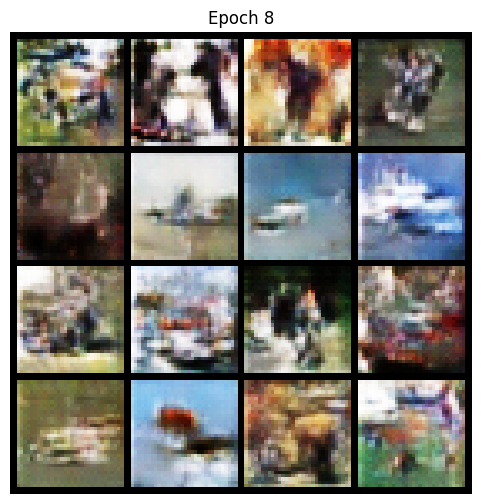

Epoch [8/20], Step [0/782], D Loss: 0.1248, G Loss: 5.1810
Epoch [8/20], Step [100/782], D Loss: 0.1848, G Loss: 3.0557
Epoch [8/20], Step [200/782], D Loss: 0.0989, G Loss: 3.9886
Epoch [8/20], Step [300/782], D Loss: 0.2133, G Loss: 4.6987
Epoch [8/20], Step [400/782], D Loss: 0.0120, G Loss: 5.2158
Epoch [8/20], Step [500/782], D Loss: 0.2635, G Loss: 3.2964
Epoch [8/20], Step [600/782], D Loss: 0.4077, G Loss: 3.0616
Epoch [8/20], Step [700/782], D Loss: 0.0440, G Loss: 7.4034


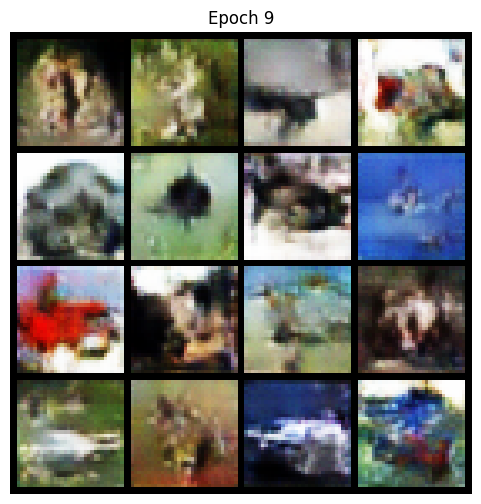

Epoch [9/20], Step [0/782], D Loss: 0.1384, G Loss: 8.2976
Epoch [9/20], Step [100/782], D Loss: 0.5953, G Loss: 3.0679
Epoch [9/20], Step [200/782], D Loss: 0.0501, G Loss: 6.6527
Epoch [9/20], Step [300/782], D Loss: 0.7238, G Loss: 1.7705
Epoch [9/20], Step [400/782], D Loss: 0.0229, G Loss: 6.2020
Epoch [9/20], Step [500/782], D Loss: 0.0494, G Loss: 5.1988
Epoch [9/20], Step [600/782], D Loss: 0.3366, G Loss: 4.3750
Epoch [9/20], Step [700/782], D Loss: 0.2497, G Loss: 4.2731


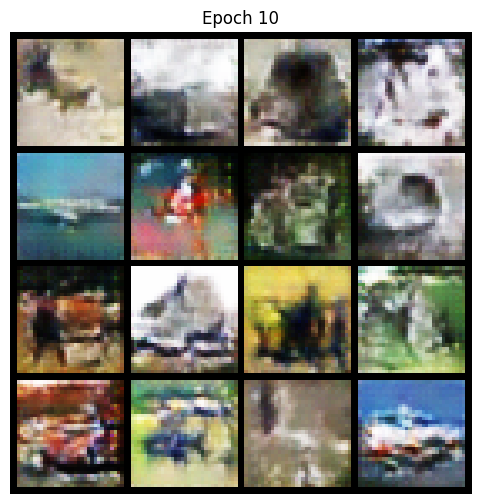

Epoch [10/20], Step [0/782], D Loss: 0.0248, G Loss: 5.6672
Epoch [10/20], Step [100/782], D Loss: 0.3699, G Loss: 2.7573
Epoch [10/20], Step [200/782], D Loss: 0.0470, G Loss: 7.3986
Epoch [10/20], Step [300/782], D Loss: 0.6225, G Loss: 2.2822
Epoch [10/20], Step [400/782], D Loss: 0.0476, G Loss: 4.6669
Epoch [10/20], Step [500/782], D Loss: 0.0509, G Loss: 5.7471
Epoch [10/20], Step [600/782], D Loss: 0.0469, G Loss: 8.4456
Epoch [10/20], Step [700/782], D Loss: 0.2950, G Loss: 3.3036


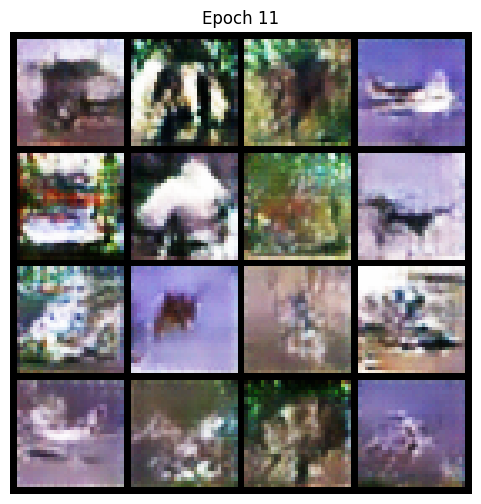

Epoch [11/20], Step [0/782], D Loss: 0.0798, G Loss: 4.0831
Epoch [11/20], Step [100/782], D Loss: 0.1781, G Loss: 3.9685
Epoch [11/20], Step [200/782], D Loss: 0.0386, G Loss: 4.9731
Epoch [11/20], Step [300/782], D Loss: 0.0633, G Loss: 5.4474
Epoch [11/20], Step [400/782], D Loss: 0.4452, G Loss: 2.8137
Epoch [11/20], Step [500/782], D Loss: 0.6500, G Loss: 2.6309
Epoch [11/20], Step [600/782], D Loss: 0.1345, G Loss: 3.9128
Epoch [11/20], Step [700/782], D Loss: 0.1027, G Loss: 3.8537


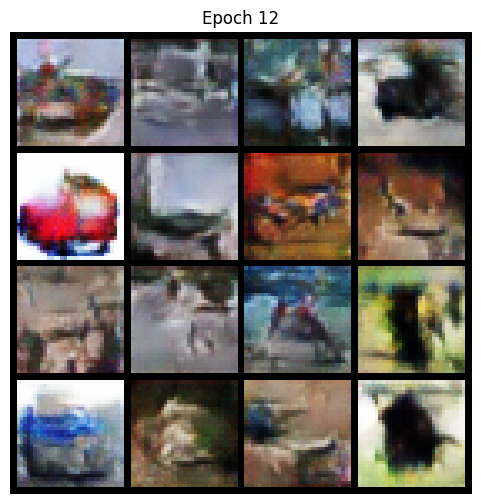

Epoch [12/20], Step [0/782], D Loss: 0.1012, G Loss: 3.7334
Epoch [12/20], Step [100/782], D Loss: 0.5883, G Loss: 3.2806
Epoch [12/20], Step [200/782], D Loss: 0.1072, G Loss: 3.1812
Epoch [12/20], Step [300/782], D Loss: 0.0247, G Loss: 5.7081
Epoch [12/20], Step [400/782], D Loss: 0.0549, G Loss: 3.9404
Epoch [12/20], Step [500/782], D Loss: 0.0437, G Loss: 6.3666
Epoch [12/20], Step [600/782], D Loss: 0.1326, G Loss: 3.4969
Epoch [12/20], Step [700/782], D Loss: 0.0162, G Loss: 9.2944


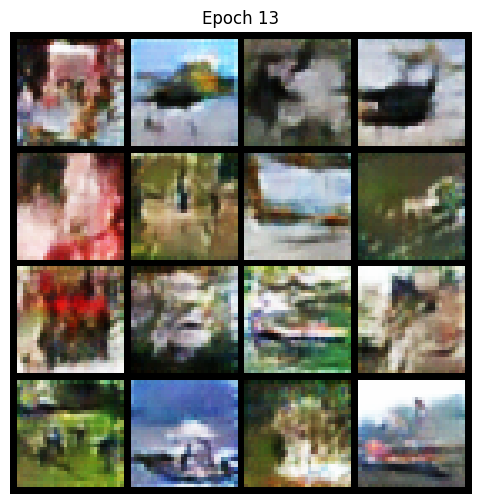

Epoch [13/20], Step [0/782], D Loss: 0.5580, G Loss: 4.0883
Epoch [13/20], Step [100/782], D Loss: 0.0951, G Loss: 4.3306
Epoch [13/20], Step [200/782], D Loss: 1.1646, G Loss: 1.1458
Epoch [13/20], Step [300/782], D Loss: 0.1360, G Loss: 3.4820
Epoch [13/20], Step [400/782], D Loss: 0.2088, G Loss: 2.9085
Epoch [13/20], Step [500/782], D Loss: 0.0354, G Loss: 6.8657
Epoch [13/20], Step [600/782], D Loss: 0.0377, G Loss: 7.4053
Epoch [13/20], Step [700/782], D Loss: 0.3599, G Loss: 3.9231


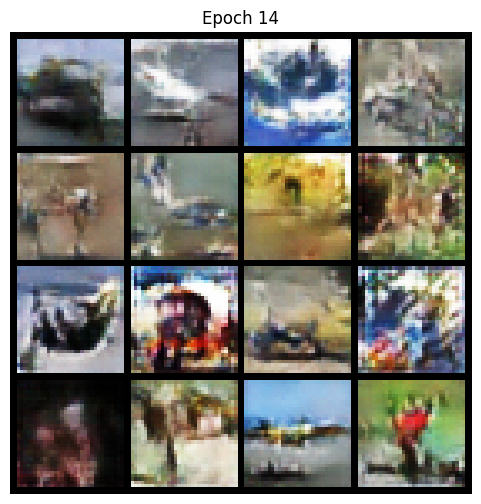

Epoch [14/20], Step [0/782], D Loss: 0.1178, G Loss: 3.5757
Epoch [14/20], Step [100/782], D Loss: 0.2223, G Loss: 4.0701
Epoch [14/20], Step [200/782], D Loss: 0.1150, G Loss: 3.3460
Epoch [14/20], Step [300/782], D Loss: 0.3199, G Loss: 4.4290
Epoch [14/20], Step [400/782], D Loss: 0.0653, G Loss: 8.3461
Epoch [14/20], Step [500/782], D Loss: 0.1754, G Loss: 3.2200
Epoch [14/20], Step [600/782], D Loss: 0.5359, G Loss: 4.3045
Epoch [14/20], Step [700/782], D Loss: 0.5109, G Loss: 3.9197


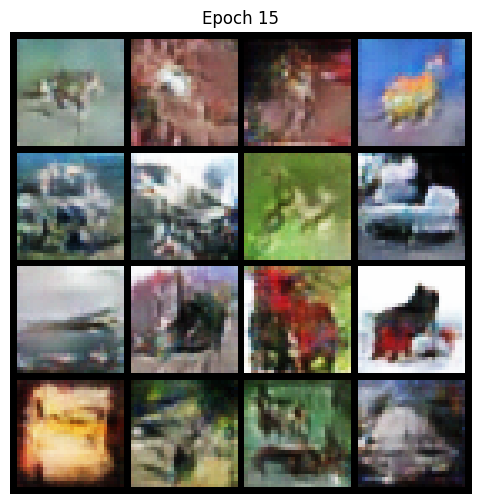

Epoch [15/20], Step [0/782], D Loss: 0.8178, G Loss: 3.1075
Epoch [15/20], Step [100/782], D Loss: 0.3286, G Loss: 4.8496
Epoch [15/20], Step [200/782], D Loss: 0.0964, G Loss: 4.5844
Epoch [15/20], Step [300/782], D Loss: 0.0540, G Loss: 4.4078
Epoch [15/20], Step [400/782], D Loss: 0.1262, G Loss: 4.0395
Epoch [15/20], Step [500/782], D Loss: 0.1562, G Loss: 4.2025
Epoch [15/20], Step [600/782], D Loss: 0.0493, G Loss: 5.6302
Epoch [15/20], Step [700/782], D Loss: 0.1028, G Loss: 7.4035


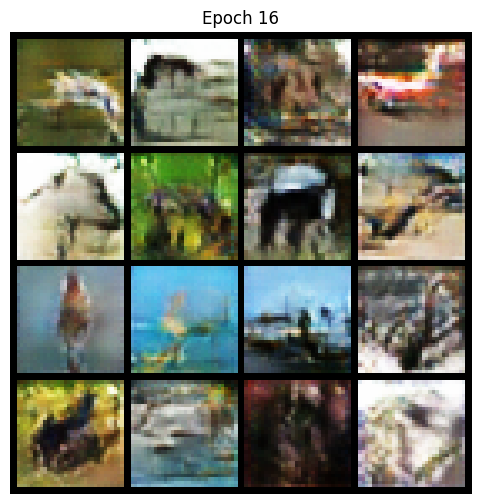

Epoch [16/20], Step [0/782], D Loss: 0.7765, G Loss: 5.5425
Epoch [16/20], Step [100/782], D Loss: 0.0347, G Loss: 7.0717
Epoch [16/20], Step [200/782], D Loss: 3.4133, G Loss: 2.1218
Epoch [16/20], Step [300/782], D Loss: 0.0904, G Loss: 4.6527
Epoch [16/20], Step [400/782], D Loss: 5.0347, G Loss: 7.6684
Epoch [16/20], Step [500/782], D Loss: 0.4525, G Loss: 1.2775
Epoch [16/20], Step [600/782], D Loss: 0.0300, G Loss: 6.2901
Epoch [16/20], Step [700/782], D Loss: 0.2033, G Loss: 4.1808


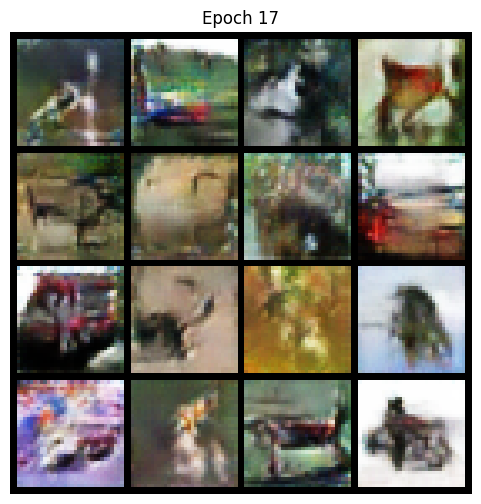

Epoch [17/20], Step [0/782], D Loss: 0.0431, G Loss: 6.2991
Epoch [17/20], Step [100/782], D Loss: 0.3450, G Loss: 4.1842
Epoch [17/20], Step [200/782], D Loss: 0.0224, G Loss: 6.6736
Epoch [17/20], Step [300/782], D Loss: 0.2433, G Loss: 5.8489
Epoch [17/20], Step [400/782], D Loss: 0.4162, G Loss: 5.6842
Epoch [17/20], Step [500/782], D Loss: 0.1382, G Loss: 3.0882
Epoch [17/20], Step [600/782], D Loss: 0.3222, G Loss: 3.3635
Epoch [17/20], Step [700/782], D Loss: 0.2479, G Loss: 3.4881


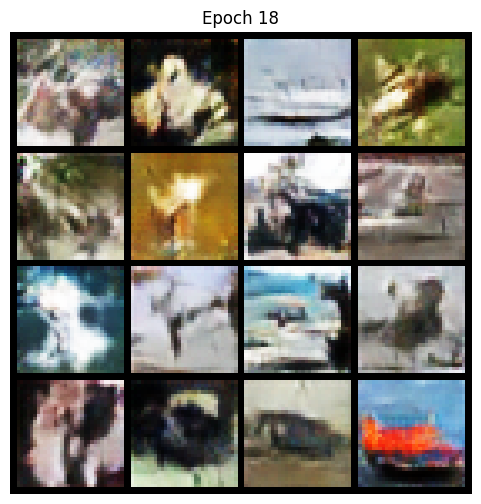

Epoch [18/20], Step [0/782], D Loss: 0.0619, G Loss: 4.0172
Epoch [18/20], Step [100/782], D Loss: 0.0354, G Loss: 4.3779
Epoch [18/20], Step [200/782], D Loss: 0.1201, G Loss: 4.3748
Epoch [18/20], Step [300/782], D Loss: 2.1004, G Loss: 1.4589
Epoch [18/20], Step [400/782], D Loss: 0.0748, G Loss: 3.7885
Epoch [18/20], Step [500/782], D Loss: 0.0385, G Loss: 6.2807
Epoch [18/20], Step [600/782], D Loss: 0.1825, G Loss: 3.9627
Epoch [18/20], Step [700/782], D Loss: 0.1494, G Loss: 3.3716


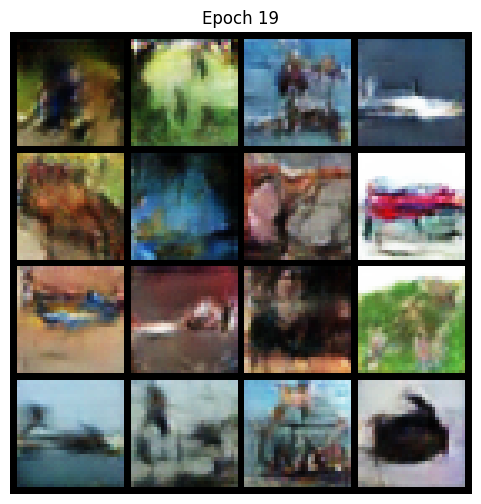

Epoch [19/20], Step [0/782], D Loss: 0.0461, G Loss: 4.7056
Epoch [19/20], Step [100/782], D Loss: 0.1435, G Loss: 3.1895
Epoch [19/20], Step [200/782], D Loss: 0.1605, G Loss: 4.0060
Epoch [19/20], Step [300/782], D Loss: 0.1135, G Loss: 3.3300
Epoch [19/20], Step [400/782], D Loss: 0.3253, G Loss: 4.9306
Epoch [19/20], Step [500/782], D Loss: 0.2136, G Loss: 3.7958
Epoch [19/20], Step [600/782], D Loss: 0.0438, G Loss: 4.4023
Epoch [19/20], Step [700/782], D Loss: 0.1311, G Loss: 4.2826


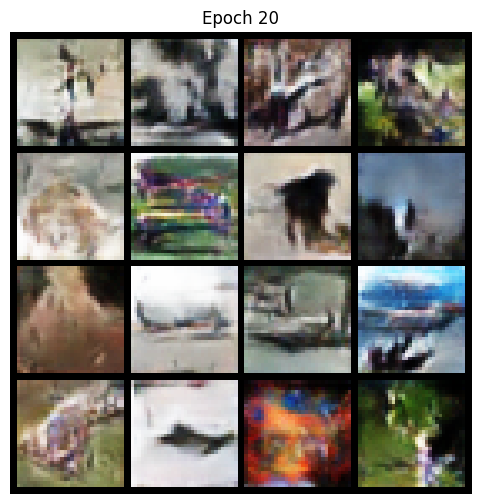

In [6]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256 * 8 * 8),
            nn.BatchNorm1d(256 * 8 * 8),
            nn.ReLU(True),
            nn.Unflatten(1, (256, 8, 8)),  # Reshape to (256, 8, 8)
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Tanh()  # Output values in range [-1, 1]
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1),
            nn.Sigmoid()  # Output probability of being real
        )

    def forward(self, x):
        return self.model(x)

# Initialize models, optimizers, and loss function
generator = Generator().to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Training Loop
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(data_loader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Real images
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        # Fake images
        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)  # Try to fool discriminator
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Step [{i}/{len(data_loader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save generated images at the end of each epoch
    with torch.no_grad():
        noise = torch.randn(16, latent_dim).to(device)
        fake_images = generator(noise).cpu()
        fake_images = (fake_images + 1) / 2  # Rescale to [0, 1]
        grid = torchvision.utils.make_grid(fake_images, nrow=4)
        plt.figure(figsize=(6, 6))
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title(f'Epoch {epoch + 1}')
        plt.show()


In [7]:
# Hyperparameters
batch_size = 64
latent_dim = 100
lr = 0.001
epochs = 15

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])
images = (images - images.min()) / (images.max() - images.min())  # Rescale to [0, 1]

Epoch [0/15], Step [0/782], Loss: 0.4430
Epoch [0/15], Step [100/782], Loss: 0.2408
Epoch [0/15], Step [200/782], Loss: 0.2720
Epoch [0/15], Step [300/782], Loss: 0.2526
Epoch [0/15], Step [400/782], Loss: 0.2569
Epoch [0/15], Step [500/782], Loss: 0.2339
Epoch [0/15], Step [600/782], Loss: 0.2461
Epoch [0/15], Step [700/782], Loss: 0.2282


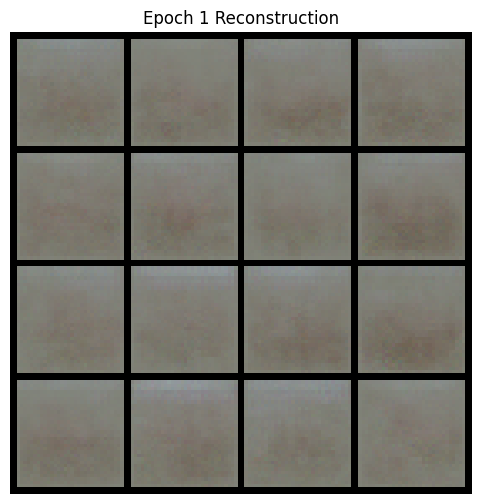

Epoch [1/15], Step [0/782], Loss: 0.2197
Epoch [1/15], Step [100/782], Loss: 0.2552
Epoch [1/15], Step [200/782], Loss: 0.2429
Epoch [1/15], Step [300/782], Loss: 0.2442
Epoch [1/15], Step [400/782], Loss: 0.2536
Epoch [1/15], Step [500/782], Loss: 0.2536
Epoch [1/15], Step [600/782], Loss: 0.2541
Epoch [1/15], Step [700/782], Loss: 0.2543


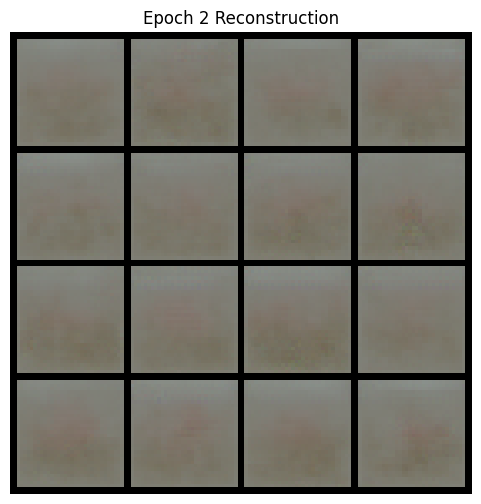

Epoch [2/15], Step [0/782], Loss: 0.2325
Epoch [2/15], Step [100/782], Loss: 0.2652
Epoch [2/15], Step [200/782], Loss: 0.2593
Epoch [2/15], Step [300/782], Loss: 0.2504
Epoch [2/15], Step [400/782], Loss: 0.2356
Epoch [2/15], Step [500/782], Loss: 0.2386
Epoch [2/15], Step [600/782], Loss: 0.2439
Epoch [2/15], Step [700/782], Loss: 0.2509


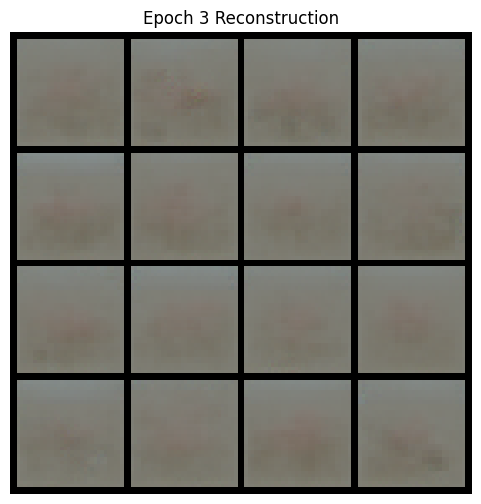

Epoch [3/15], Step [0/782], Loss: 0.2632
Epoch [3/15], Step [100/782], Loss: 0.2695
Epoch [3/15], Step [200/782], Loss: 0.2366
Epoch [3/15], Step [300/782], Loss: 0.2486
Epoch [3/15], Step [400/782], Loss: 0.2365
Epoch [3/15], Step [500/782], Loss: 0.2461
Epoch [3/15], Step [600/782], Loss: 0.2468
Epoch [3/15], Step [700/782], Loss: 0.2424


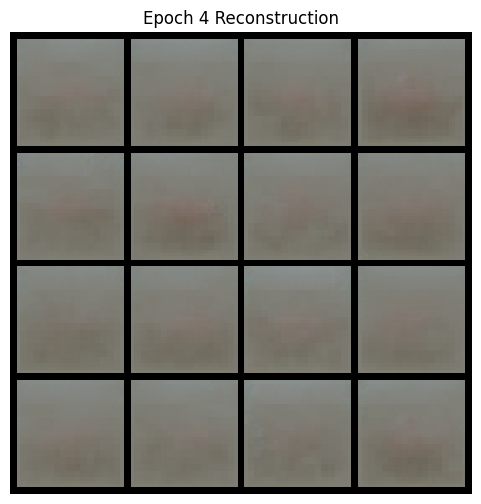

Epoch [4/15], Step [0/782], Loss: 0.2492
Epoch [4/15], Step [100/782], Loss: 0.2712
Epoch [4/15], Step [200/782], Loss: 0.2563
Epoch [4/15], Step [300/782], Loss: 0.2711
Epoch [4/15], Step [400/782], Loss: 0.2456
Epoch [4/15], Step [500/782], Loss: 0.2322
Epoch [4/15], Step [600/782], Loss: 0.2350
Epoch [4/15], Step [700/782], Loss: 0.2490


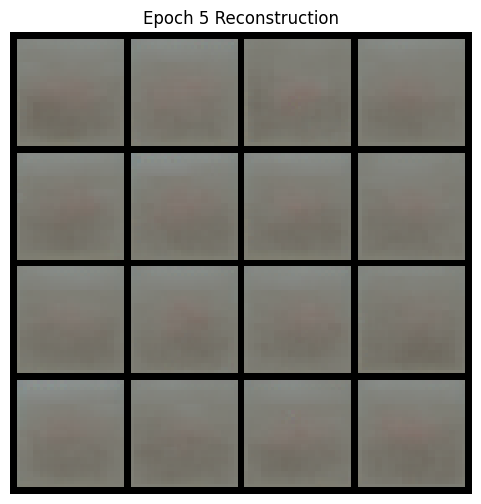

Epoch [5/15], Step [0/782], Loss: 0.2465
Epoch [5/15], Step [100/782], Loss: 0.2498
Epoch [5/15], Step [200/782], Loss: 0.2841
Epoch [5/15], Step [300/782], Loss: 0.2370
Epoch [5/15], Step [400/782], Loss: 0.2440
Epoch [5/15], Step [500/782], Loss: 0.2376
Epoch [5/15], Step [600/782], Loss: 0.2499
Epoch [5/15], Step [700/782], Loss: 0.2599


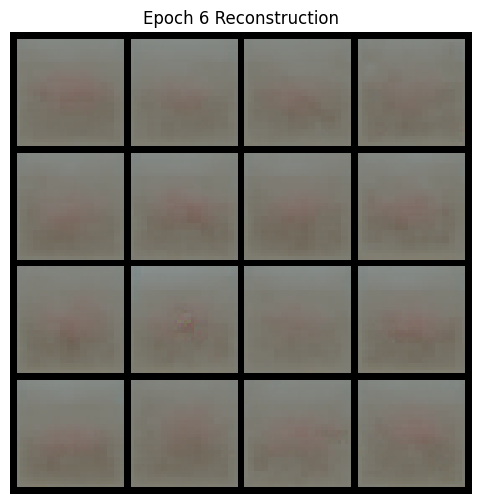

Epoch [6/15], Step [0/782], Loss: 0.2170
Epoch [6/15], Step [100/782], Loss: 0.2318
Epoch [6/15], Step [200/782], Loss: 0.2611
Epoch [6/15], Step [300/782], Loss: 0.2555
Epoch [6/15], Step [400/782], Loss: 0.2485
Epoch [6/15], Step [500/782], Loss: 0.2526
Epoch [6/15], Step [600/782], Loss: 0.2566
Epoch [6/15], Step [700/782], Loss: 0.2504


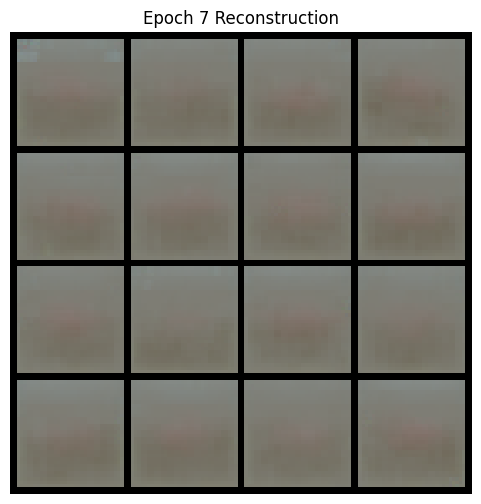

Epoch [7/15], Step [0/782], Loss: 0.2278
Epoch [7/15], Step [100/782], Loss: 0.2559
Epoch [7/15], Step [200/782], Loss: 0.2599
Epoch [7/15], Step [300/782], Loss: 0.2730
Epoch [7/15], Step [400/782], Loss: 0.2505
Epoch [7/15], Step [500/782], Loss: 0.2206
Epoch [7/15], Step [600/782], Loss: 0.2226
Epoch [7/15], Step [700/782], Loss: 0.2399


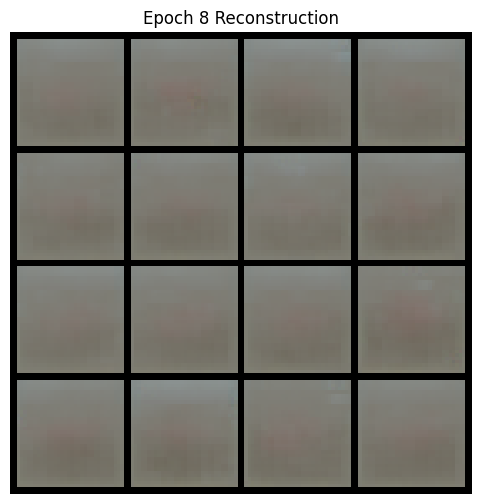

Epoch [8/15], Step [0/782], Loss: 0.2549
Epoch [8/15], Step [100/782], Loss: 0.2840
Epoch [8/15], Step [200/782], Loss: 0.2431
Epoch [8/15], Step [300/782], Loss: 0.2438
Epoch [8/15], Step [400/782], Loss: 0.2321
Epoch [8/15], Step [500/782], Loss: 0.2539
Epoch [8/15], Step [600/782], Loss: 0.2501
Epoch [8/15], Step [700/782], Loss: 0.2210


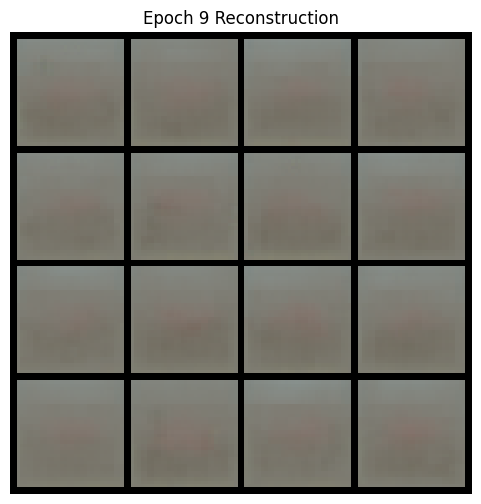

Epoch [9/15], Step [0/782], Loss: 0.2552
Epoch [9/15], Step [100/782], Loss: 0.2570
Epoch [9/15], Step [200/782], Loss: 0.2400
Epoch [9/15], Step [300/782], Loss: 0.2509
Epoch [9/15], Step [400/782], Loss: 0.2337
Epoch [9/15], Step [500/782], Loss: 0.2252
Epoch [9/15], Step [600/782], Loss: 0.2561


KeyboardInterrupt: 

In [9]:
# Define the VAE model
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)  # Mean
        self.fc_logvar = nn.Linear(256, latent_dim)  # Log variance

        # Decoder
        self.decoder_input = nn.Linear(latent_dim, 128 * 8 * 8)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # Output values in range [-1, 1]
        )

    def encode(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        logvar = self.fc_logvar(encoded)
        return mu, logvar

    def decode(self, z):
        decoded_input = self.decoder_input(z)
        decoded = self.decoder(decoded_input)
        return decoded

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Initialize the model, optimizer, and loss function
vae = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=lr)
criterion = nn.MSELoss()

# Loss function with KL divergence
def vae_loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = criterion(reconstructed, original)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / original.size(0)
    return reconstruction_loss + kl_divergence

# Training loop
for epoch in range(epochs):
    vae.train()
    for i, (images, _) in enumerate(data_loader):
        images = images.to(device)
        optimizer.zero_grad()

        # Forward pass
        reconstructed, mu, logvar = vae(images)
        loss = vae_loss_function(reconstructed, images, mu, logvar)

        # Backward pass
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Step [{i}/{len(data_loader)}], Loss: {loss.item():.4f}")

    # Display reconstructed images after each epoch
    vae.eval()
    with torch.no_grad():
        images, _ = next(iter(data_loader))
        images = images.to(device)
        reconstructed, _, _ = vae(images)
        images = (images + 1) / 2  # Rescale to [0, 1]
        reconstructed = (reconstructed + 1) / 2
        grid = torchvision.utils.make_grid(reconstructed[:16].cpu(), nrow=4)
        plt.figure(figsize=(6, 6))
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title(f'Epoch {epoch + 1} Reconstruction')
        plt.show()

# Generate new images
vae.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    generated_images = vae.decode(z)
    generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]
    grid = torchvision.utils.make_grid(generated_images.cpu(), nrow=4)
    plt.figure(figsize=(6, 6))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Generated Images")
    plt.show()


In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])
images = (images - images.min()) / (images.max() - images.min())  # Rescale to [0, 1]


Epoch [0/15], Step [0/782], Loss: 0.3908
Epoch [0/15], Step [100/782], Loss: 0.2637
Epoch [0/15], Step [200/782], Loss: 0.2540
Epoch [0/15], Step [300/782], Loss: 0.2267
Epoch [0/15], Step [400/782], Loss: 0.2596
Epoch [0/15], Step [500/782], Loss: 0.2292
Epoch [0/15], Step [600/782], Loss: 0.2550
Epoch [0/15], Step [700/782], Loss: 0.2416


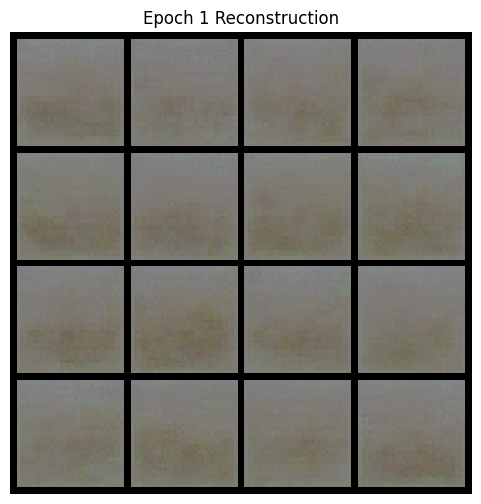

Epoch [1/15], Step [0/782], Loss: 0.2365
Epoch [1/15], Step [100/782], Loss: 0.2592
Epoch [1/15], Step [200/782], Loss: 0.2194
Epoch [1/15], Step [300/782], Loss: 0.2289
Epoch [1/15], Step [400/782], Loss: 0.2377
Epoch [1/15], Step [500/782], Loss: 0.2537
Epoch [1/15], Step [600/782], Loss: 0.2442
Epoch [1/15], Step [700/782], Loss: 0.2076


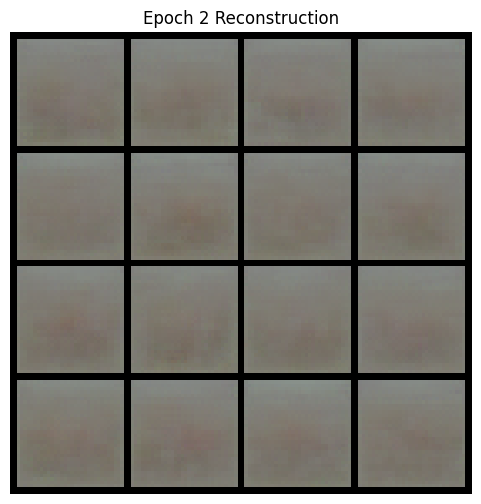

Epoch [2/15], Step [0/782], Loss: 0.2649
Epoch [2/15], Step [100/782], Loss: 0.2702
Epoch [2/15], Step [200/782], Loss: 0.2126
Epoch [2/15], Step [300/782], Loss: 0.2416
Epoch [2/15], Step [400/782], Loss: 0.2691
Epoch [2/15], Step [500/782], Loss: 0.2452
Epoch [2/15], Step [600/782], Loss: 0.2502
Epoch [2/15], Step [700/782], Loss: 0.2808


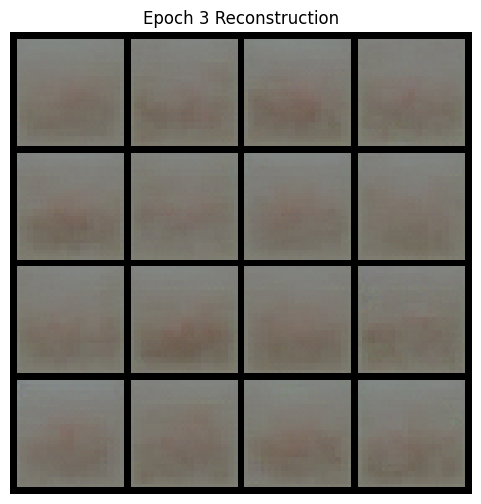

Epoch [3/15], Step [0/782], Loss: 0.2522
Epoch [3/15], Step [100/782], Loss: 0.2277
Epoch [3/15], Step [200/782], Loss: 0.2507
Epoch [3/15], Step [300/782], Loss: 0.2692
Epoch [3/15], Step [400/782], Loss: 0.2501
Epoch [3/15], Step [500/782], Loss: 0.2602
Epoch [3/15], Step [600/782], Loss: 0.2532
Epoch [3/15], Step [700/782], Loss: 0.2666


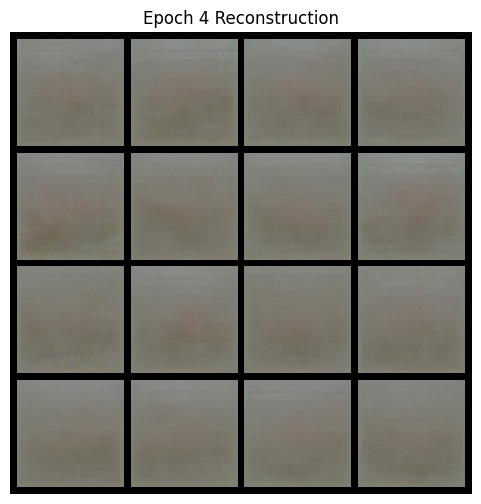

Epoch [4/15], Step [0/782], Loss: 0.2774
Epoch [4/15], Step [100/782], Loss: 0.2463
Epoch [4/15], Step [200/782], Loss: 0.2264
Epoch [4/15], Step [300/782], Loss: 0.2370
Epoch [4/15], Step [400/782], Loss: 0.2729
Epoch [4/15], Step [500/782], Loss: 0.2833
Epoch [4/15], Step [600/782], Loss: 0.2563
Epoch [4/15], Step [700/782], Loss: 0.2510


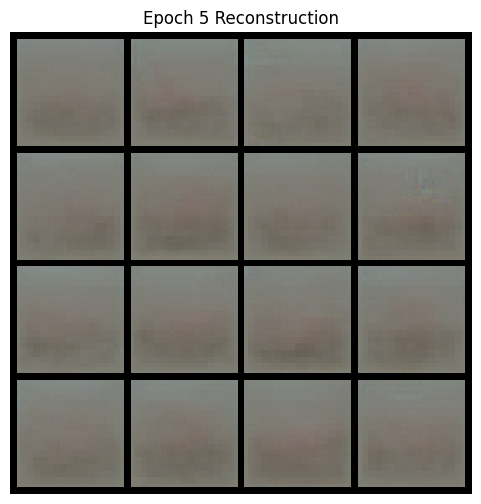

Epoch [5/15], Step [0/782], Loss: 0.2547
Epoch [5/15], Step [100/782], Loss: 0.2699
Epoch [5/15], Step [200/782], Loss: 0.2508
Epoch [5/15], Step [300/782], Loss: 0.2144
Epoch [5/15], Step [400/782], Loss: 0.2440
Epoch [5/15], Step [500/782], Loss: 0.2707
Epoch [5/15], Step [600/782], Loss: 0.2254
Epoch [5/15], Step [700/782], Loss: 0.2504


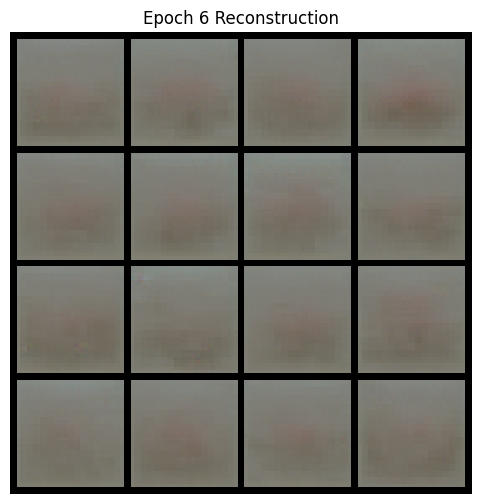

Epoch [6/15], Step [0/782], Loss: 0.2622
Epoch [6/15], Step [100/782], Loss: 0.2381
Epoch [6/15], Step [200/782], Loss: 0.2527
Epoch [6/15], Step [300/782], Loss: 0.2249
Epoch [6/15], Step [400/782], Loss: 0.2287
Epoch [6/15], Step [500/782], Loss: 0.2512
Epoch [6/15], Step [600/782], Loss: 0.2185
Epoch [6/15], Step [700/782], Loss: 0.2900


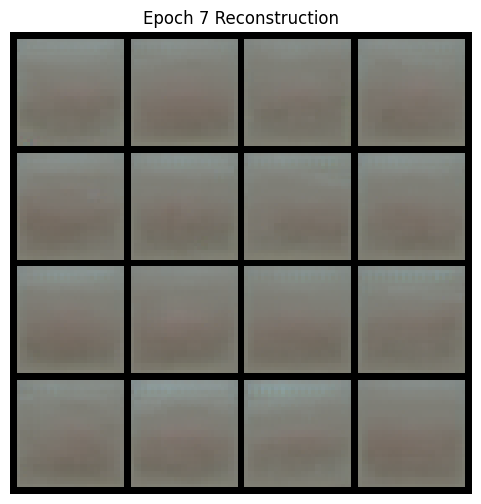

Epoch [7/15], Step [0/782], Loss: 0.2568
Epoch [7/15], Step [100/782], Loss: 0.2324
Epoch [7/15], Step [200/782], Loss: 0.2478
Epoch [7/15], Step [300/782], Loss: 0.2527
Epoch [7/15], Step [400/782], Loss: 0.2654
Epoch [7/15], Step [500/782], Loss: 0.2677
Epoch [7/15], Step [600/782], Loss: 0.2400


KeyboardInterrupt: 

In [12]:
# Define the VAE model
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(256, latent_dim)  # Mean
        self.fc_logvar = nn.Linear(256, latent_dim)  # Log variance

        # Decoder
        self.decoder_input = nn.Linear(latent_dim, 128 * 8 * 8)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # Output values in range [-1, 1]
        )

    def encode(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        logvar = self.fc_logvar(encoded)
        return mu, logvar

    def decode(self, z):
        decoded_input = self.decoder_input(z)
        decoded = self.decoder(decoded_input)
        return decoded

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

# Initialize the model, optimizer, and loss function
vae = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=lr)
criterion = nn.MSELoss()

# Loss function with KL divergence
def vae_loss_function(reconstructed, original, mu, logvar):
    reconstruction_loss = criterion(reconstructed, original)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / original.size(0)
    return reconstruction_loss + kl_divergence

# Training loop
for epoch in range(epochs):
    vae.train()
    for i, (images, _) in enumerate(data_loader):
        images = images.to(device)
        optimizer.zero_grad()

        # Forward pass
        reconstructed, mu, logvar = vae(images)
        loss = vae_loss_function(reconstructed, images, mu, logvar)

        # Backward pass
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Step [{i}/{len(data_loader)}], Loss: {loss.item():.4f}")

    # Display reconstructed images after each epoch
    vae.eval()
    with torch.no_grad():
        images, _ = next(iter(data_loader))
        images = images.to(device)
        reconstructed, _, _ = vae(images)
        images = (images + 1) / 2  # Rescale to [0, 1]
        reconstructed = (reconstructed + 1) / 2
        grid = torchvision.utils.make_grid(reconstructed[:16].cpu(), nrow=4)
        plt.figure(figsize=(6, 6))
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title(f'Epoch {epoch + 1} Reconstruction')
        plt.show()

# Generate new images
vae.eval()
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    generated_images = vae.decode(z)
    generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]
    grid = torchvision.utils.make_grid(generated_images.cpu(), nrow=4)
    plt.figure(figsize=(6, 6))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Generated Images")
    plt.show()
